In [1]:
# Librerías
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# CARGA Y LECTURA DE DATOS

In [2]:
# Carga y lectura del json feb-2020
df_UsoFeb = pd.read_json('BiciMAD_movements_2020_1_6/202002_movements.json', lines=True)

In [3]:
df_UsoFeb.shape

(341972, 11)

In [4]:
# See the json columns in feb-2020
df_UsoFeb.columns

Index(['_id', 'user_day_code', 'idplug_base', 'user_type', 'idunplug_base',
       'travel_time', 'idunplug_station', 'ageRange', 'idplug_station',
       'unplug_hourTime', 'zip_code'],
      dtype='object')

In [5]:
# Carga y lectura del resto de json disponibles de 2020
df_UsoEne= pd.read_json('BiciMAD_movements_2020_1_6/202001_movements.json', lines=True)
df_UsoMar= pd.read_json('BiciMAD_movements_2020_1_6/202003_movements.json', lines=True)
df_UsoAbr= pd.read_json('BiciMAD_movements_2020_1_6/202004_movements.json', lines=True)
df_UsoMay= pd.read_json('BiciMAD_movements_2020_1_6/202005_movements.json', lines=True)
df_UsoJun= pd.read_json('BiciMAD_movements_2020_1_6/202006_movements.json', lines=True)

In [6]:
# Columnas del json de jun-20
df_UsoJun.columns

Index(['_id', 'user_day_code', 'idplug_base', 'user_type', 'idunplug_base',
       'travel_time', 'idunplug_station', 'ageRange', 'idplug_station',
       'unplug_hourTime', 'zip_code'],
      dtype='object')

In [7]:
df_UsoEne.shape

(272875, 11)

In [8]:
# Load and read json from july 2019 to december 2019
df_UsoDic= pd.read_json('BiciMAD_movements_2019_7_12/201912_movements.json', lines=True)
df_UsoNov= pd.read_json('BiciMAD_movements_2019_7_12/201911_movements.json', lines=True)
df_UsoOct= pd.read_json('BiciMAD_movements_2019_7_12/201910_movements.json', lines=True)
df_UsoSep= pd.read_json('BiciMAD_movements_2019_7_12/201909_movements.json', lines=True)
df_UsoAgo= pd.read_json('BiciMAD_movements_2019_7_12/201908_movements.json', lines=True)
df_UsoJul= pd.read_json('BiciMAD_movements_2019_7_12/201907_movements.json', lines=True)

In [9]:
df_UsoJul.columns

Index(['_id', 'user_day_code', 'idplug_base', 'user_type', 'idunplug_base',
       'travel_time', 'idunplug_station', 'ageRange', 'idplug_station',
       'unplug_hourTime', 'zip_code'],
      dtype='object')

In [10]:
# Load and read json from january 2019 to june 2019
df_UsoEne19 = pd.read_csv('DATOS/201901_movements.csv', sep=';')
df_UsoFeb19 = pd.read_csv('DATOS/201902_movements.csv', sep=';')
df_UsoMar19 = pd.read_csv('DATOS/201903_movements.csv', sep=';')
df_UsoAbr19 = pd.read_csv('DATOS/201904_movements.csv', sep=';')
df_UsoMay19 = pd.read_csv('DATOS/201905_movements.csv', sep=';')
df_UsoJun19 = pd.read_csv('DATOS/201906_movements.csv', sep=';')

In [11]:
df_UsoJun19.columns
# Algunas columnas tienen nombres diferentes, por tanto habrá que unificarlo para poder unir todos los json

Index(['_id.$oid', 'ageRange', 'idplug_base', 'idplug_station',
       'idunplug_base', 'idunplug_station', 'travel_time',
       'unplug_hourTime.$date', 'user_day_code', 'user_type', 'zip_code'],
      dtype='object')

In [12]:
# Union de los json de ene-19 a jun-19
df_old = pd.concat([df_UsoEne19, df_UsoFeb19, df_UsoMar19, df_UsoAbr19, df_UsoMay19, df_UsoJun19])

In [13]:
# Se unifica el nombre de las columnas de ene-19 a jun-19
df_old = df_old.rename(columns={"_id.$oid":"_id", "unplug_hourTime.$date":"unplug_hourTime"})
cols = ['_id', 'user_day_code', 'idplug_base', 'user_type', 'idunplug_base', 'travel_time', 
        'idunplug_station', 'ageRange', 'idplug_station', 'unplug_hourTime', 'zip_code']
df_old = df_old[cols]
df_old.head()

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code
0,5c4b07ea2f38432e007daab8,b3b5b61509ab89afbf4d1e589d229bebe6637c2de819f5...,14,1,23,162,82,0,83,2019-01-01T00:00:00Z,NaN
1,5c4b07ea2f38432e007daaba,a18550d468153bb8e1808d4f0a85955579951832772996...,10,1,1,415,133,5,36,2019-01-01T00:00:00Z,28005
2,5c4b07ea2f38432e007daabb,905737396c2fe343c84d62eaee3ab66e19632638c5bea7...,5,1,3,545,25,0,90,2019-01-01T00:00:00Z,NaN
3,5c4b07ea2f38432e007daabe,ed1c1a22c120e7d42cc522c33ab41db549791f3914b273...,4,1,12,448,51,4,44,2019-01-01T00:00:00Z,28005
4,5c4b07ea2f38432e007daac0,c7d4e8f50d4a318e4f9fb08d4b715dc9015be1f415358b...,17,1,4,639,44,0,125,2019-01-01T00:00:00Z,NaN


In [14]:
# Se sustituyen valores vacíos de "zip_code" por 0
df_old["zip_code"] = df_old["zip_code"].fillna(0)

# CREACIÓN Y EDA DEL DATAFRAME GENERAL: 
# Movimientos BiciMAD entre ene-19 y jun-20

In [15]:
# Se unen todos los json desde ene-19 a jun-20
df_raw = pd.concat([df_old, df_UsoJul, df_UsoAgo, df_UsoSep, df_UsoOct, df_UsoNov, df_UsoDic, df_UsoEne, df_UsoFeb, df_UsoMar,
                   df_UsoAbr, df_UsoMay, df_UsoJun], 
                   axis=0, ignore_index=True)

In [16]:
df_raw.shape

(5063509, 11)

In [17]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5063509 entries, 0 to 5063508
Data columns (total 11 columns):
_id                 object
user_day_code       object
idplug_base         int64
user_type           int64
idunplug_base       int64
travel_time         int64
idunplug_station    int64
ageRange            int64
idplug_station      int64
unplug_hourTime     object
zip_code            object
dtypes: int64(7), object(4)
memory usage: 424.9+ MB


In [18]:
df_raw.head()

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code
0,5c4b07ea2f38432e007daab8,b3b5b61509ab89afbf4d1e589d229bebe6637c2de819f5...,14,1,23,162,82,0,83,2019-01-01T00:00:00Z,0
1,5c4b07ea2f38432e007daaba,a18550d468153bb8e1808d4f0a85955579951832772996...,10,1,1,415,133,5,36,2019-01-01T00:00:00Z,28005
2,5c4b07ea2f38432e007daabb,905737396c2fe343c84d62eaee3ab66e19632638c5bea7...,5,1,3,545,25,0,90,2019-01-01T00:00:00Z,0
3,5c4b07ea2f38432e007daabe,ed1c1a22c120e7d42cc522c33ab41db549791f3914b273...,4,1,12,448,51,4,44,2019-01-01T00:00:00Z,28005
4,5c4b07ea2f38432e007daac0,c7d4e8f50d4a318e4f9fb08d4b715dc9015be1f415358b...,17,1,4,639,44,0,125,2019-01-01T00:00:00Z,0


In [19]:
# Veo el rango temporal del conjunto de datos
print(df_raw.unplug_hourTime.min())
print(df_raw.unplug_hourTime.max())

2019-01-01T00:00:00Z
2020-06-15T21:00:00Z


In [20]:
df_raw[df_raw.travel_time < 0].shape
# Hay 72 registros de la variable travel_time con valores negativos

(72, 11)

In [21]:
# Compruebo si hay valores nulos
df_raw.isnull().sum()

_id                 0
user_day_code       0
idplug_base         0
user_type           0
idunplug_base       0
travel_time         0
idunplug_station    0
ageRange            0
idplug_station      0
unplug_hourTime     0
zip_code            0
dtype: int64

In [22]:
# Conversion de variables a string
df_raw._id = df_raw._id.astype(str)
df_raw.user_day_code = df_raw.user_day_code.astype(str)

In [23]:
# Transformación con LabelEncoder
transf = LabelEncoder()
df_raw._id = transf.fit_transform(df_raw._id)
df_raw.user_day_code = transf.fit_transform(df_raw.user_day_code)

In [24]:
# Transformación de los valores vacíos de zip_code a 0
df_raw["zip_code"] = df_raw["zip_code"].replace([''], 0)
df_raw["zip_code"].value_counts()

0        2578584
28005     261307
28012     214184
28007     199694
28004     194399
          ...   
28130          1
03005          1
25810          1
18015          1
9400           1
Name: zip_code, Length: 747, dtype: int64

In [25]:
# Número de registros con duración del movimiento inferior a 60 segundos
df_raw[df_raw.travel_time <= 60].shape

(88439, 11)

In [26]:
# Número de registros con duración del movimiento superior a 7200 segundos
df_raw[df_raw.travel_time >= 7200].shape

(41043, 11)

In [27]:
# Se estipula un mínimo y un máximo estándar de los viajes: 60 segundos como mínimo y 7200 segundos como máximo
# También eliminamos los viajes de los usuarios de mantenimiento (user 3) que se analizaran
time1 = df_raw["travel_time"] >= 60
time2 = df_raw["travel_time"] <= 7200
user = df_raw["user_type"] != 3
df_Uso1 = df_raw[time1 & time2 & user]

In [28]:
# Se crea un conjunto de datos solo con los viajes de los user 3
Uso_mant = df_raw[df_raw["user_type"] == 3]
Uso_mant.head()

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code
925,985,555474,6,3,8,2119,129,0,112,2019-01-01T06:00:00Z,0
926,982,555474,4,3,6,2112,129,0,112,2019-01-01T06:00:00Z,0
927,987,555474,7,3,9,2173,129,0,112,2019-01-01T06:00:00Z,0
928,984,555474,5,3,7,2144,129,0,112,2019-01-01T06:00:00Z,0
929,988,555474,8,3,11,2155,129,0,112,2019-01-01T06:00:00Z,0


In [29]:
Uso_mant.shape

(349020, 11)

In [30]:
df_raw[df_raw.user_type == 3].shape

(349020, 11)

In [31]:
df_Uso1.shape

(4685180, 11)

In [32]:
df_Uso1.head()

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code
0,0,1962435,14,1,23,162,82,0,83,2019-01-01T00:00:00Z,0
1,1,1763458,10,1,1,415,133,5,36,2019-01-01T00:00:00Z,28005
2,2,1575571,5,1,3,545,25,0,90,2019-01-01T00:00:00Z,0
3,3,2589037,4,1,12,448,51,4,44,2019-01-01T00:00:00Z,28005
4,4,2181468,17,1,4,639,44,0,125,2019-01-01T00:00:00Z,0


In [33]:
df_Uso1 = df_Uso1[df_Uso1["user_type"] != 0]

1    4632943
2      50955
Name: user_type, dtype: int64

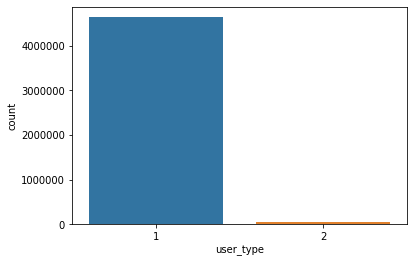

In [34]:
sns.countplot(x=df_Uso1.user_type)
df_Uso1.user_type.value_counts()

In [35]:
df_Uso1.travel_time.sort_values(ascending=False)

685906     7200
1338051    7200
1924277    7200
4951194    7200
1343382    7200
           ... 
3220190      60
1895899      60
324347       60
3848721      60
2539867      60
Name: travel_time, Length: 4683898, dtype: int64

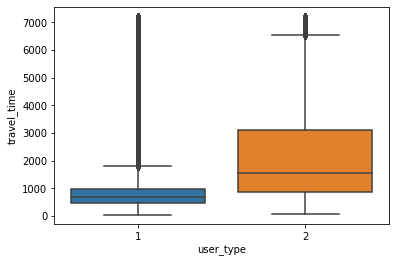

In [36]:
sns.boxplot(x="user_type", y= "travel_time", data=df_Uso1)

In [37]:
# Creación de la "time" a partir de la variable "unplug_hourTime"
df_Uso1["time"] = pd.to_datetime(df_Uso1["unplug_hourTime"])

In [38]:
# Creación de nuevas variables relacionadas con la fecha: hour, day, week-day...
df_Uso1.loc[:, "hour"] = df_Uso1.loc[:, "time"].dt.hour
df_Uso1.loc[:, "day"] = df_Uso1.loc[:, "time"].dt.day
df_Uso1.loc[:, "wday"] = df_Uso1.loc[:, "time"].dt.weekday
df_Uso1.loc[:, "month"] = df_Uso1.loc[:, "time"].dt.month
df_Uso1.loc[:, "year"] = df_Uso1.loc[:, "time"].dt.year

In [39]:
# Para realizar gráficos, se genera una variable date más corta
df_Uso1["date"] = df_Uso1["day"].map(str) + '-' + df_Uso1["month"].map(str) + '-' + df_Uso1["year"].map(str)

In [40]:
df_Uso1.head()

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code,time,hour,day,wday,month,year,date
0,0,1962435,14,1,23,162,82,0,83,2019-01-01T00:00:00Z,0,2019-01-01 00:00:00+00:00,0,1,1,1,2019,1-1-2019
1,1,1763458,10,1,1,415,133,5,36,2019-01-01T00:00:00Z,28005,2019-01-01 00:00:00+00:00,0,1,1,1,2019,1-1-2019
2,2,1575571,5,1,3,545,25,0,90,2019-01-01T00:00:00Z,0,2019-01-01 00:00:00+00:00,0,1,1,1,2019,1-1-2019
3,3,2589037,4,1,12,448,51,4,44,2019-01-01T00:00:00Z,28005,2019-01-01 00:00:00+00:00,0,1,1,1,2019,1-1-2019
4,4,2181468,17,1,4,639,44,0,125,2019-01-01T00:00:00Z,0,2019-01-01 00:00:00+00:00,0,1,1,1,2019,1-1-2019


In [41]:
# Comprobamos los resultados de las transformaciones
df_Uso1.dtypes

_id                               int32
user_day_code                     int32
idplug_base                       int64
user_type                         int64
idunplug_base                     int64
travel_time                       int64
idunplug_station                  int64
ageRange                          int64
idplug_station                    int64
unplug_hourTime                  object
zip_code                         object
time                datetime64[ns, UTC]
hour                              int64
day                               int64
wday                              int64
month                             int64
year                              int64
date                             object
dtype: object

In [42]:
# Creo dos conjuntos distintos de antes de la crisis de la COVID-19 y cuando comienza
df_beforeCOVID = df_Uso1[(df_Uso1.time <  "2020-03-15 23:00:00+00:00")]
df_afterCOVID = df_Uso1[(df_Uso1.time >  "2020-03-16 00:00:00+00:00")]

In [43]:
# Comprobación del rango de fechas analizado
print(df_beforeCOVID.time.min())
print(df_beforeCOVID.time.max())

2019-01-01 00:00:00+00:00
2020-03-15 22:00:00+00:00


In [44]:
# Comprobación del rango de fechas analizado
print(df_afterCOVID.time.min())
print(df_afterCOVID.time.max())

2020-03-16 04:00:00+00:00
2020-06-15 21:00:00+00:00


In [45]:
# Hay estaciones que se han quitado o no salen en algunos meses... 
estaciones_old = df_UsoEne19.idunplug_station.unique()
estaciones_new = df_UsoJun.idunplug_station.unique()
estaciones_eliminadas = [estacion for estacion in estaciones_old if estacion not in estaciones_new]
estaciones_eliminadas

[15, 2008]

In [46]:
# Creación de un dataframe para analizar las rutas entre estación origen y estación destino. Se analizarán el número de
# movimientos (o repeticiones) y la duración media.
comb = df_Uso1.groupby(['idunplug_station', 'idplug_station'])["_id"].count().reset_index()
comb.sort_values(by='_id', ascending=False)

,idunplug_station,idplug_station,_id
1854,9,149,3347
1075,6,6,2723
12874,64,64,2490
27669,135,135,2398
27026,132,132,2294
...,...,...,...
43662,210,178,1
5525,29,192,1
31350,152,188,1
44514,214,178,1


In [47]:
# Saco el travel_time medio de las combinaciones anteriores
time = df_Uso1.groupby(['idunplug_station', 'idplug_station'])["travel_time"].mean().reset_index()
time.sort_values(by='travel_time', ascending=False)

,idunplug_station,idplug_station,travel_time
39978,193,111,7077.000000
41391,200,28,6856.000000
2113,10,194,6840.000000
37168,180,32,6724.000000
24310,119,188,6694.000000
...,...,...,...
2244,11,111,237.590909
20163,100,97,236.494949
19534,97,109,233.666667
22514,111,98,206.653846


In [48]:
# Combino ambas tablas
df = pd.merge(comb, time, on=["idunplug_station", "idplug_station"], how= 'left')
df.sort_values(by='_id', ascending=False)

,idunplug_station,idplug_station,_id,travel_time
1854,9,149,3347,651.011652
1075,6,6,2723,2366.760925
12874,64,64,2490,2953.949398
27669,135,135,2398,2948.929108
27026,132,132,2294,3230.078466
...,...,...,...,...
43662,210,178,1,1534.000000
5525,29,192,1,991.000000
31350,152,188,1,1605.000000
44514,214,178,1,1692.000000


In [49]:
df = df.rename(columns={"_id":"num_movimientos"})

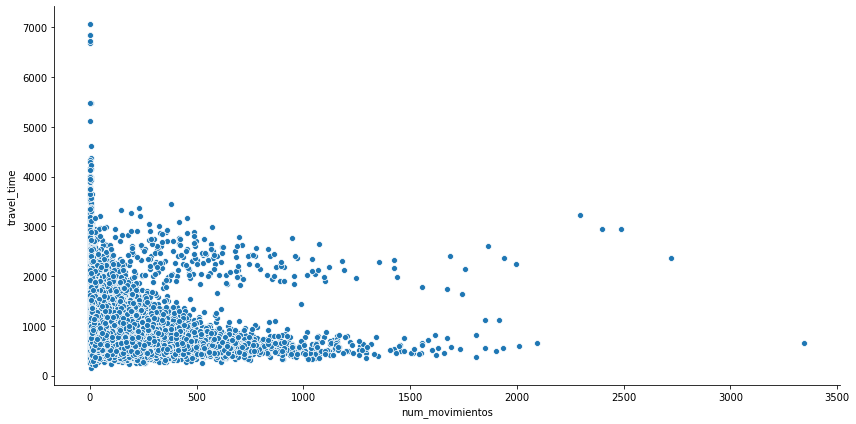

In [50]:
# Gráfico de las combinaciones por número de viajes y tiempo medio del TOTAL de viajes entre Julio 2019 y Junio(15) 2020
sns.relplot(data=df, x="num_movimientos", y="travel_time", kind="scatter", height=6, aspect=2)
# Se observa que, en general, en las combinaciones con mayor número de viajes, el tiempo medio es menor. De esta manera,
# podemos diferenciar dos tipo de viajes: unos más "rutinarios" con mayor número de movimientos ("_id"), y otro más turísticos 
# o "de paseo" con menor número de movimientos.

In [51]:
# Saco el travel_time medio de las combinaciones anteriores
line = df_Uso1.groupby(["idunplug_station", "idplug_station", "time"])["_id"].count().reset_index()
line.sort_values(by="_id", ascending=False).head()

,idunplug_station,idplug_station,time,_id
2846720,132,132,2019-06-02 19:00:00+00:00,18
2987128,138,138,2020-05-16 18:00:00+00:00,15
3875575,175,175,2020-05-19 18:00:00+00:00,15
4143503,205,205,2020-05-10 18:00:00+00:00,14
3427445,160,160,2020-05-24 18:00:00+00:00,13


In [52]:
# Creo un conjunto con los datos recogidos antes del inicio de la crisis sanitaria "df_before"
comb_before = df_beforeCOVID.groupby(['idunplug_station', 'idplug_station'])["_id"].count().reset_index()
time_before = df_beforeCOVID.groupby(['idunplug_station', 'idplug_station'])["travel_time"].mean().reset_index()
df_before = pd.merge(comb_before, time_before, on=["idunplug_station", "idplug_station"], how= 'left')

In [53]:
# Tiempo medio y numero medio de viajes ANTES de la crisis
print(df_before.travel_time.mean())
print(df_before._id.mean())

1045.234141952184
93.7994076169846


In [54]:
df_before = df_before.rename(columns={"_id":"num_movimientos"})

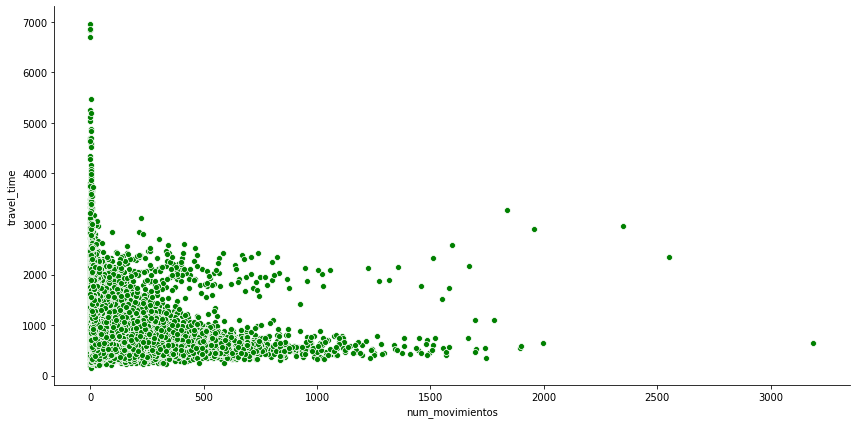

In [55]:
# Gráfico de las combinaciones por número de viajes y tiempo medio de ANTES DE LA CRISIS
sns.relplot(data=df_before, x="num_movimientos", y="travel_time", kind="scatter", color="green", height=6, aspect=2)

In [56]:
# Creo un conjunto con los datos recogidos tras el inicio de la crisis sanitaria "df_after"
comb_after = df_afterCOVID.groupby(['idunplug_station', 'idplug_station'])["_id"].count().reset_index()
time_after = df_afterCOVID.groupby(['idunplug_station', 'idplug_station'])["travel_time"].mean().reset_index()
df_after = pd.merge(comb_after, time_after, on=["idunplug_station", "idplug_station"], how= 'left')

In [57]:
# Tiempo medio y numero medio de viajes DESPUÉS de la crisis
print(df_after.travel_time.mean())
print(df_after._id.mean())
# Con la crisis sanitaria el número medio de viajes por combinación se reduce significativamente y el tiempo medio del trayecto
# se incrementa.

1269.1396138658324
10.533551828903615


In [58]:
df_after = df_after.rename(columns={"_id":"num_movimientos"})

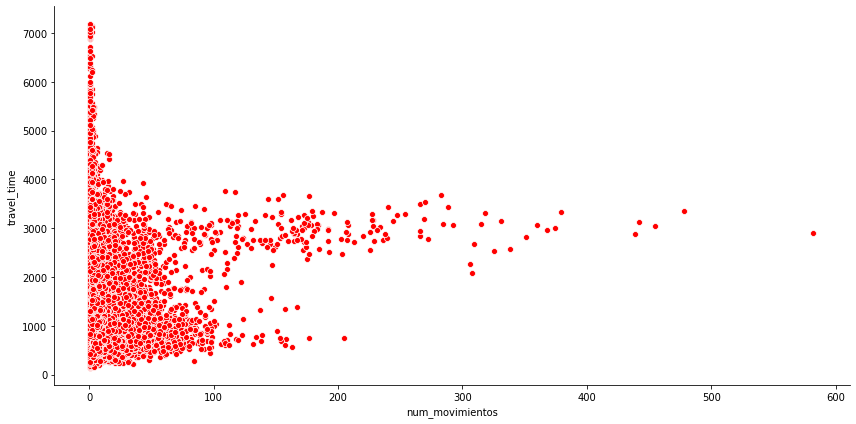

In [59]:
# Gráfico de las combinaciones por número de viajes y tiempo medio de DESPUÉS DEL COMIENZO DE LA CRISIS
sns.relplot(data=df_after, x="num_movimientos", y="travel_time", kind="scatter", color="red", height=6, aspect=2)
plt.show()

C:\Users\adria\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


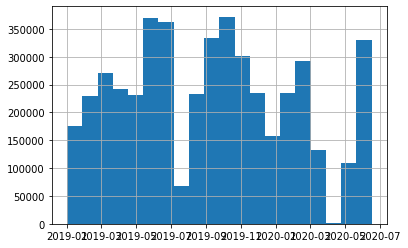

In [60]:
# Evolución del número de viajes (total usuario)
df_Uso1.time.hist(bins=20)
plt.show()

In [61]:
# Volumen de movimientos realizado por los usuarios generales (user1) y los usuarios puntuales (user2)
df_Uso1.user_type.value_counts()

1    4632943
2      50955
Name: user_type, dtype: int64

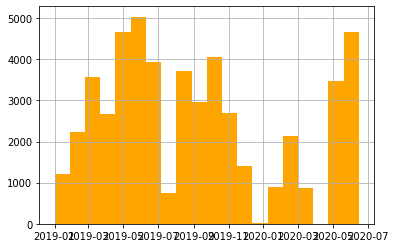

In [62]:
# Evolución del número de viajes de usuario OCASIONALES
df_Uso1[df_Uso1["user_type"]==2]["time"].hist(color='orange', bins=20)
plt.show()
# Bastantes viajes de usuarios puntuales en la primera quincena de Junio 2020

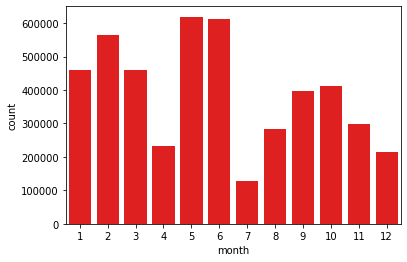

In [63]:
sns.countplot(df_Uso1.month, color = 'red')

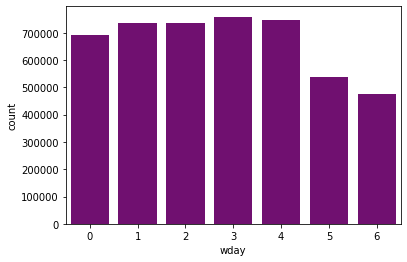

In [64]:
# Day of the week
# 0 Monday
# 1 Tuesday
# 2 Wednesday
# 3 Thursday
# 4 Friday
# 5 Saturday
# 6 Sunday
sns.countplot(df_Uso1.wday, color = 'purple')

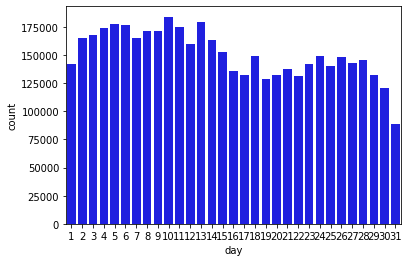

In [65]:
sns.countplot(df_Uso1.day, color = 'blue')

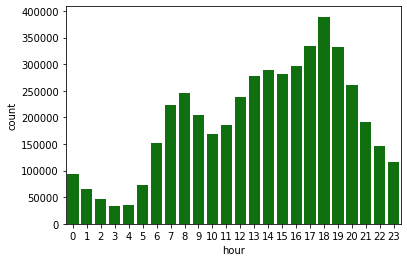

In [66]:
sns.countplot(df_Uso1.hour, color = 'green')

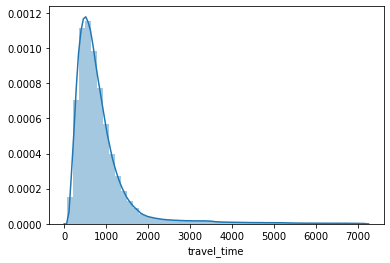

In [67]:
sns.distplot(df_Uso1.travel_time)

In [68]:
# Voy a crear la tabla para las predicciones
df = df_Uso1[ ["_id",  "time", "idunplug_station"]]

In [69]:
# La agrupo por hora y estacion (con el "idunplug_station")
data = df.groupby(['time', 'idunplug_station']).count().reset_index()

In [70]:
data

,time,idunplug_station,_id
0,2019-01-01 00:00:00+00:00,3,1
1,2019-01-01 00:00:00+00:00,4,2
2,2019-01-01 00:00:00+00:00,9,2
3,2019-01-01 00:00:00+00:00,13,1
4,2019-01-01 00:00:00+00:00,17,2
...,...,...,...
1382621,2020-06-15 21:00:00+00:00,206,3
1382622,2020-06-15 21:00:00+00:00,207,1
1382623,2020-06-15 21:00:00+00:00,211,1
1382624,2020-06-15 21:00:00+00:00,213,3


# EXPLORACIÓN DE MODELOS PREDICTIVOS DE DEMANDA

In [71]:
# Se va a explorar la creación de modelos predictivos de la demanda, es decir, de modelos que predicen el número de
# movimientos que se realizarán en el futuro a partir de la serie existente

# Modelo 1

In [72]:
# Transformación de la variable time con LabelEncoder para el modelo
transf = LabelEncoder()
data.time = transf.fit_transform(data.time)

C:\Users\adria\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:1752: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  return asanyarray(a).ravel(order=order)


In [73]:
data.head()

,time,idunplug_station,_id
0,0,3,1
1,0,4,2
2,0,9,2
3,0,13,1
4,0,17,2


In [74]:
data.shape

(1382626, 3)

In [75]:
# Libreías
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

In [76]:
# La variable a predecir será el número de movimientos que en este caso se llama "_id", que corresponde con la cuenta
# de movimientos únicos registrados en el período correspondiente, ya sea por día, mes, etc.
X = data.drop(columns='_id').values
y = data._id.values

In [77]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.4, random_state=21)

In [78]:
# Se utiliza la estandarización de los datos (StandarScaler) y el regresor GradientBoostingRegressor
steps = [('scaler', StandardScaler()),
        ('xgb', GradientBoostingRegressor(n_estimators=100))]
pipeline = Pipeline(steps)
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [79]:
u = ((y_test - y_pred)**2).sum() 
v = ((y_test - y_test.mean()) ** 2).sum()
R2 = (1 - u/v)
R2
# Sale un resultado bastante pobre

0.12968201098703835

In [80]:
# Con la métrica de scikit learn r2_score (simplemente para comprobar que da el mismo resultado)
r2_score(y_test, y_pred)

0.12968201098703835

# Modelo 2

In [81]:
# A continuación se explora con otro modelo para predecir el número de movimientos en el futuro por estación de origen,
# es decir, el número de salidas que se producirán por cada estación de origen.
# Además, se incorporarán variables externas que influyen de manera importante en la demanda del servicio, como son las
# temperaturas mínima y máxima de cada día

In [128]:
# Voy a crear la tabla para las predicciones
df2 = df_Uso1[["_id", "time", "day", "month", "year", "idunplug_station"]]
df2["time"] = pd.to_datetime(df2["time"])
df2.head()

C:\Users\adria\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,_id,time,day,month,year,idunplug_station
0,0,2019-01-01 00:00:00+00:00,1,1,2019,82
1,1,2019-01-01 00:00:00+00:00,1,1,2019,133
2,2,2019-01-01 00:00:00+00:00,1,1,2019,25
3,3,2019-01-01 00:00:00+00:00,1,1,2019,51
4,4,2019-01-01 00:00:00+00:00,1,1,2019,44


In [123]:
df2["date"] = df2["day"].map(str) + '-' + df2["month"].map(str) + '-' + df2["year"].map(str)
df2.head()

C:\Users\adria\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,_id,time,day,month,year,idunplug_station,date
0,0,2019-01-01 00:00:00+00:00,1,1,2019,82,1-1-2019
1,1,2019-01-01 00:00:00+00:00,1,1,2019,133,1-1-2019
2,2,2019-01-01 00:00:00+00:00,1,1,2019,25,1-1-2019
3,3,2019-01-01 00:00:00+00:00,1,1,2019,51,1-1-2019
4,4,2019-01-01 00:00:00+00:00,1,1,2019,44,1-1-2019


In [124]:
# La agrupo por dia y estacion (con el "idunplug_station")
data2 = df2.groupby(["date", "idunplug_station"]).count().reset_index()
data2.head()

,date,idunplug_station,_id,time,day,month,year
0,1-1-2019,1,21,21,21,21,21
1,1-1-2019,2,6,6,6,6,6
2,1-1-2019,3,23,23,23,23,23
3,1-1-2019,4,14,14,14,14,14
4,1-1-2019,5,18,18,18,18,18


In [125]:
data_inicial = data2[["date", "idunplug_station", "_id"]]
data_inicial.head()

,date,idunplug_station,_id
0,1-1-2019,1,21
1,1-1-2019,2,6
2,1-1-2019,3,23
3,1-1-2019,4,14
4,1-1-2019,5,18


In [126]:
# Importo los datos de temperatura
clima = pd.read_csv('C:/Users/adria/Documents/TFM/Adrian/Temp_media_dia_datosclima.es.csv', sep=';')
clima['time'] = pd.to_datetime(clima['time'], format="%Y/%m/%d", utc=True)
clima.head()

,time,T. Maxima,T.Minima
0,2019-01-01 00:00:00+00:00,11.7,1.4
1,2019-01-02 00:00:00+00:00,11.7,0.4
2,2019-01-03 00:00:00+00:00,11.8,2.8
3,2019-01-04 00:00:00+00:00,11.4,0.4
4,2019-01-05 00:00:00+00:00,10.8,-0.1


In [87]:
# Compruebo que el rango temporal es igual al de Bicimad
print(clima.time.min())
print(clima.time.max())

2019-01-01 00:00:00+00:00
2020-06-15 00:00:00+00:00


In [88]:
clima.loc[:, 'day'] = clima.loc[:, 'time'].dt.day
clima.loc[:, 'month'] = clima.loc[:, 'time'].dt.month
clima.loc[:, 'year'] = clima.loc[:, 'time'].dt.year
clima.loc[:, 'date'] = clima.loc[:, 'day'].map(str) + '-' + clima.loc[:, 'month'].map(str) + '-' + clima.loc[:, 'year'].map(str)
clima

,time,T. Maxima,T.Minima,day,month,year,date
0,2019-01-01 00:00:00+00:00,11.7,1.4,1,1,2019,1-1-2019
1,2019-01-02 00:00:00+00:00,11.7,0.4,2,1,2019,2-1-2019
2,2019-01-03 00:00:00+00:00,11.8,2.8,3,1,2019,3-1-2019
3,2019-01-04 00:00:00+00:00,11.4,0.4,4,1,2019,4-1-2019
4,2019-01-05 00:00:00+00:00,10.8,-0.1,5,1,2019,5-1-2019
...,...,...,...,...,...,...,...
527,2020-06-11 00:00:00+00:00,24.0,14.2,11,6,2020,11-6-2020
528,2020-06-12 00:00:00+00:00,20.9,10.0,12,6,2020,12-6-2020
529,2020-06-13 00:00:00+00:00,23.4,10.3,13,6,2020,13-6-2020
530,2020-06-14 00:00:00+00:00,25.5,12.9,14,6,2020,14-6-2020


In [89]:
data_full = pd.merge(data_inicial, clima, on='date', how= 'left')
data_full.shape
data_full.to_csv('C:/Users/adria/Documents/TFM/data_full.csv', index= False, encoding= 'iso8859_15', sep= ';')

In [90]:
data_modelo = data_full[["date", "idunplug_station", "T. Maxima", "T.Minima", "_id"]]
data_modelo

,date,idunplug_station,T. Maxima,T.Minima,_id
0,1-1-2019,1,11.7,1.4,21
1,1-1-2019,2,11.7,1.4,6
2,1-1-2019,3,11.7,1.4,23
3,1-1-2019,4,11.7,1.4,14
4,1-1-2019,5,11.7,1.4,18
...,...,...,...,...,...
90122,9-9-2019,212,29.8,16.5,69
90123,9-9-2019,213,29.8,16.5,62
90124,9-9-2019,215,29.8,16.5,41
90125,9-9-2019,218,29.8,16.5,38


In [91]:
fig = data_modelo.groupby(data_modelo.date).count().reset_index()
fig.loc[:, 'date'] =pd.to_datetime(fig.date, infer_datetime_format=True, format="%Y/%m/%d")
fig

,date,idunplug_station,T. Maxima,T.Minima,_id
0,2019-01-01,165,165,165,165
1,2020-01-01,206,206,206,206
2,2019-01-10,205,205,205,205
3,2019-01-11,209,209,209,209
4,2019-01-12,205,205,205,205
...,...,...,...,...,...
469,2019-09-06,171,171,171,171
470,2020-09-06,211,211,211,211
471,2019-09-07,184,184,184,184
472,2019-09-08,190,190,190,190


In [92]:
transf = LabelEncoder()
data_modelo["date"] = transf.fit_transform(data_modelo["date"])
data_modelo

C:\Users\adria\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,idunplug_station,T. Maxima,T.Minima,_id
0,0,1,11.7,1.4,21
1,0,2,11.7,1.4,6
2,0,3,11.7,1.4,23
3,0,4,11.7,1.4,14
4,0,5,11.7,1.4,18
...,...,...,...,...,...
90122,473,212,29.8,16.5,69
90123,473,213,29.8,16.5,62
90124,473,215,29.8,16.5,41
90125,473,218,29.8,16.5,38


In [93]:
data_modelo.isna().sum()

date                0
idunplug_station    0
T. Maxima           0
T.Minima            0
_id                 0
dtype: int64

In [94]:
X = data_modelo.drop(columns='_id').values
y = data_modelo._id.values

In [95]:
X.shape

(90127, 4)

In [96]:
y.shape

(90127,)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=21)

In [98]:
steps = [('scaler', StandardScaler()),
        ('xgb', GradientBoostingRegressor(n_estimators=100))]
pipeline = Pipeline(steps)
model3 = pipeline.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

In [99]:
# Cáculo manual del R2 score
u = ((y_test - y_pred3)**2).sum() 
v = ((y_test - y_test.mean()) ** 2).sum()
R2 = (1 - u/v)
R2

0.40991893864758944

In [100]:
# Se obtiene un R2 de 0.41 lo que supone una mejora importante con respecto al modelo probado anteriormente. No osbtante,
# hay que seguir explorando posibles mejoras

# Modelo 3

In [101]:
# Lo mismo pero con datos anteriores a la crisis sanitaria
agg_before = df_Uso1.groupby(["idunplug_station", "date"])["_id"].count().reset_index()
agg_before

,idunplug_station,date,_id
0,1,1-1-2019,21
1,1,1-1-2020,1
2,1,1-10-2019,144
3,1,1-11-2019,87
4,1,1-2-2019,81
...,...,...,...
90122,2008,21-5-2019,2
90123,2008,23-4-2019,3
90124,2008,26-3-2019,2
90125,2008,5-6-2019,1


In [102]:
data_before = pd.merge(agg_before, clima, on='date', how= 'left')
data_before

,idunplug_station,date,_id,time,T. Maxima,T.Minima,day,month,year
0,1,1-1-2019,21,2019-01-01 00:00:00+00:00,11.7,1.4,1,1,2019
1,1,1-1-2020,1,2020-01-01 00:00:00+00:00,11.2,1.9,1,1,2020
2,1,1-10-2019,144,2019-10-01 00:00:00+00:00,26.5,14.0,1,10,2019
3,1,1-11-2019,87,2019-11-01 00:00:00+00:00,19.3,14.3,1,11,2019
4,1,1-2-2019,81,2019-02-01 00:00:00+00:00,9.4,3.5,1,2,2019
...,...,...,...,...,...,...,...,...,...
90122,2008,21-5-2019,2,2019-05-21 00:00:00+00:00,25.8,13.5,21,5,2019
90123,2008,23-4-2019,3,2019-04-23 00:00:00+00:00,14.2,5.7,23,4,2019
90124,2008,26-3-2019,2,2019-03-26 00:00:00+00:00,21.0,6.0,26,3,2019
90125,2008,5-6-2019,1,2019-06-05 00:00:00+00:00,22.1,12.7,5,6,2019


In [103]:
data_bef_modelo = data_before[["date", "idunplug_station", "T. Maxima", "T.Minima", "_id"]]
data_bef_modelo.head()

,date,idunplug_station,T. Maxima,T.Minima,_id
0,1-1-2019,1,11.7,1.4,21
1,1-1-2020,1,11.2,1.9,1
2,1-10-2019,1,26.5,14.0,144
3,1-11-2019,1,19.3,14.3,87
4,1-2-2019,1,9.4,3.5,81


In [104]:
transf = LabelEncoder()
data_bef_modelo["date"] = transf.fit_transform(data_bef_modelo["date"])
data_bef_modelo.head()

C:\Users\adria\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,idunplug_station,T. Maxima,T.Minima,_id
0,0,1,11.7,1.4,21
1,1,1,11.2,1.9,1
2,2,1,26.5,14.0,144
3,3,1,19.3,14.3,87
4,5,1,9.4,3.5,81


In [105]:
data_bef_modelo.shape

(90127, 5)

In [106]:
X = data_bef_modelo.drop(columns='_id').values
y = data_bef_modelo._id.values

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=21)

In [108]:
steps = [('scaler', StandardScaler()),
        ('xgb', GradientBoostingRegressor(n_estimators=100))]
pipeline = Pipeline(steps)
model4 = pipeline.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)

In [109]:
r2_score(y_test, y_pred4, multioutput='variance_weighted')
# Apenas se incrementa a 0.42

0.41623039694450237

# Modelo 4

In [110]:
# Se va a probar otro modelo en el que incorporamos las variables lat y long de cada estación de BiciMAD
estaciones_agg = pd.read_csv('estaciones_agg.csv', sep=';', encoding= 'iso8859_15')
estaciones_agg

,id,latitude,longitude
0,1,40.417191,-3.701814
1,2,40.417266,-3.701618
2,3,40.420589,-3.705841
3,4,40.430294,-3.706917
4,5,40.428552,-3.702587
...,...,...,...
210,216,40.466361,-3.688639
211,217,40.465678,-3.688772
212,218,40.419674,-3.702673
213,219,40.420590,-3.702390


In [111]:
estaciones = estaciones_agg.id.unique()
estaciones_new = df_UsoJun.idunplug_station.unique()
estaciones_comp = [estacion for estacion in estaciones if estacion not in estaciones_new]
estaciones_comp

[15, 220]

In [112]:
data_bef_modelo = data_bef_modelo.rename(columns={"_id":"Movimientos", "idunplug_station":"id"})
data_bef_modelo

,date,id,T. Maxima,T.Minima,Movimientos
0,0,1,11.7,1.4,21
1,1,1,11.2,1.9,1
2,2,1,26.5,14.0,144
3,3,1,19.3,14.3,87
4,5,1,9.4,3.5,81
...,...,...,...,...,...
90122,213,2008,25.8,13.5,2
90123,241,2008,14.2,5.7,3
90124,285,2008,21.0,6.0,2
90125,401,2008,22.1,12.7,1


In [113]:
data_full_bef = pd.merge(data_bef_modelo, estaciones_agg, on="id", how= 'left')
data_full_bef

,date,id,T. Maxima,T.Minima,Movimientos,latitude,longitude
0,0,1,11.7,1.4,21,40.417191,-3.701814
1,1,1,11.2,1.9,1,40.417191,-3.701814
2,2,1,26.5,14.0,144,40.417191,-3.701814
3,3,1,19.3,14.3,87,40.417191,-3.701814
4,5,1,9.4,3.5,81,40.417191,-3.701814
...,...,...,...,...,...,...,...
90122,213,2008,25.8,13.5,2,NaN,NaN
90123,241,2008,14.2,5.7,3,NaN,NaN
90124,285,2008,21.0,6.0,2,NaN,NaN
90125,401,2008,22.1,12.7,1,NaN,NaN


In [114]:
# Elimino los datos de las estaciones de las que no se dispone latitud y longitud para el mes Jun20
data_clean_bef = data_full_bef.dropna()

In [115]:
data_clean_bef

,date,id,T. Maxima,T.Minima,Movimientos,latitude,longitude
0,0,1,11.7,1.4,21,40.417191,-3.701814
1,1,1,11.2,1.9,1,40.417191,-3.701814
2,2,1,26.5,14.0,144,40.417191,-3.701814
3,3,1,19.3,14.3,87,40.417191,-3.701814
4,5,1,9.4,3.5,81,40.417191,-3.701814
...,...,...,...,...,...,...,...
90115,465,219,16.5,7.7,56,40.420590,-3.702390
90116,468,219,23.2,13.0,18,40.420590,-3.702390
90117,470,219,23.8,10.8,51,40.420590,-3.702390
90118,472,219,31.4,21.8,14,40.420590,-3.702390


In [116]:
X = data_clean_bef.drop(columns='Movimientos').values
y = data_clean_bef.Movimientos.values

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=21)

In [118]:
steps = [('scaler', StandardScaler()),
        ('xgb', GradientBoostingRegressor(n_estimators=100))]
pipeline = Pipeline(steps)
model5 = pipeline.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)

In [119]:
r2_score(y_test, y_pred5, multioutput='variance_weighted')
# Incorporando latitud y longitud sube a 0.47. Aún así es un modelo bastante pobre...

0.4661639590942216

In [120]:
# Valorando la incorporación de otras variables externas y realización de feature engineering...

In [121]:
# En proceso de más pruebas...